In [89]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [90]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [91]:
bos_target = pd.DataFrame(boston.target)
bos_target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [92]:
print (boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [93]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [94]:
bos.columns = boston.feature_names

In [95]:
bos['Price'] = boston.target

In [96]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [97]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [98]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

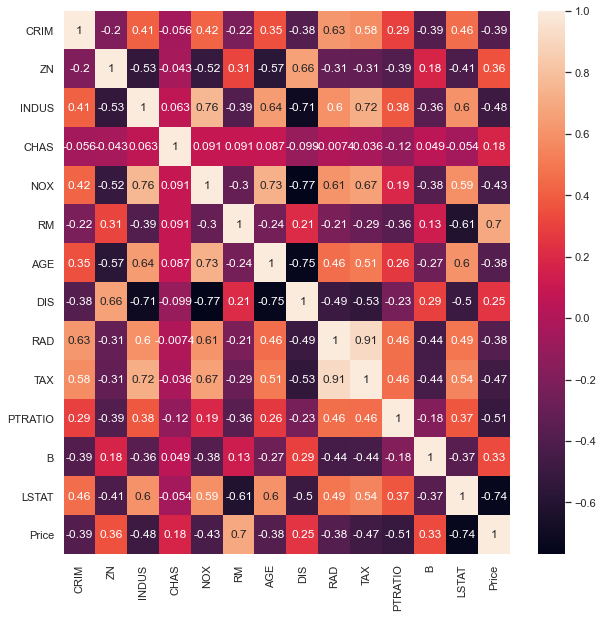

In [99]:
plt.figure(figsize=(10,10))
correlation_matrix = bos.corr()
sns.heatmap(data=correlation_matrix,annot = True)

In [100]:
# Highest Correlation is seen between RAD and TAX. So removing one of the columns, Here I am removing RAD

In [101]:
bos = bos.drop('RAD',axis=1)

In [102]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

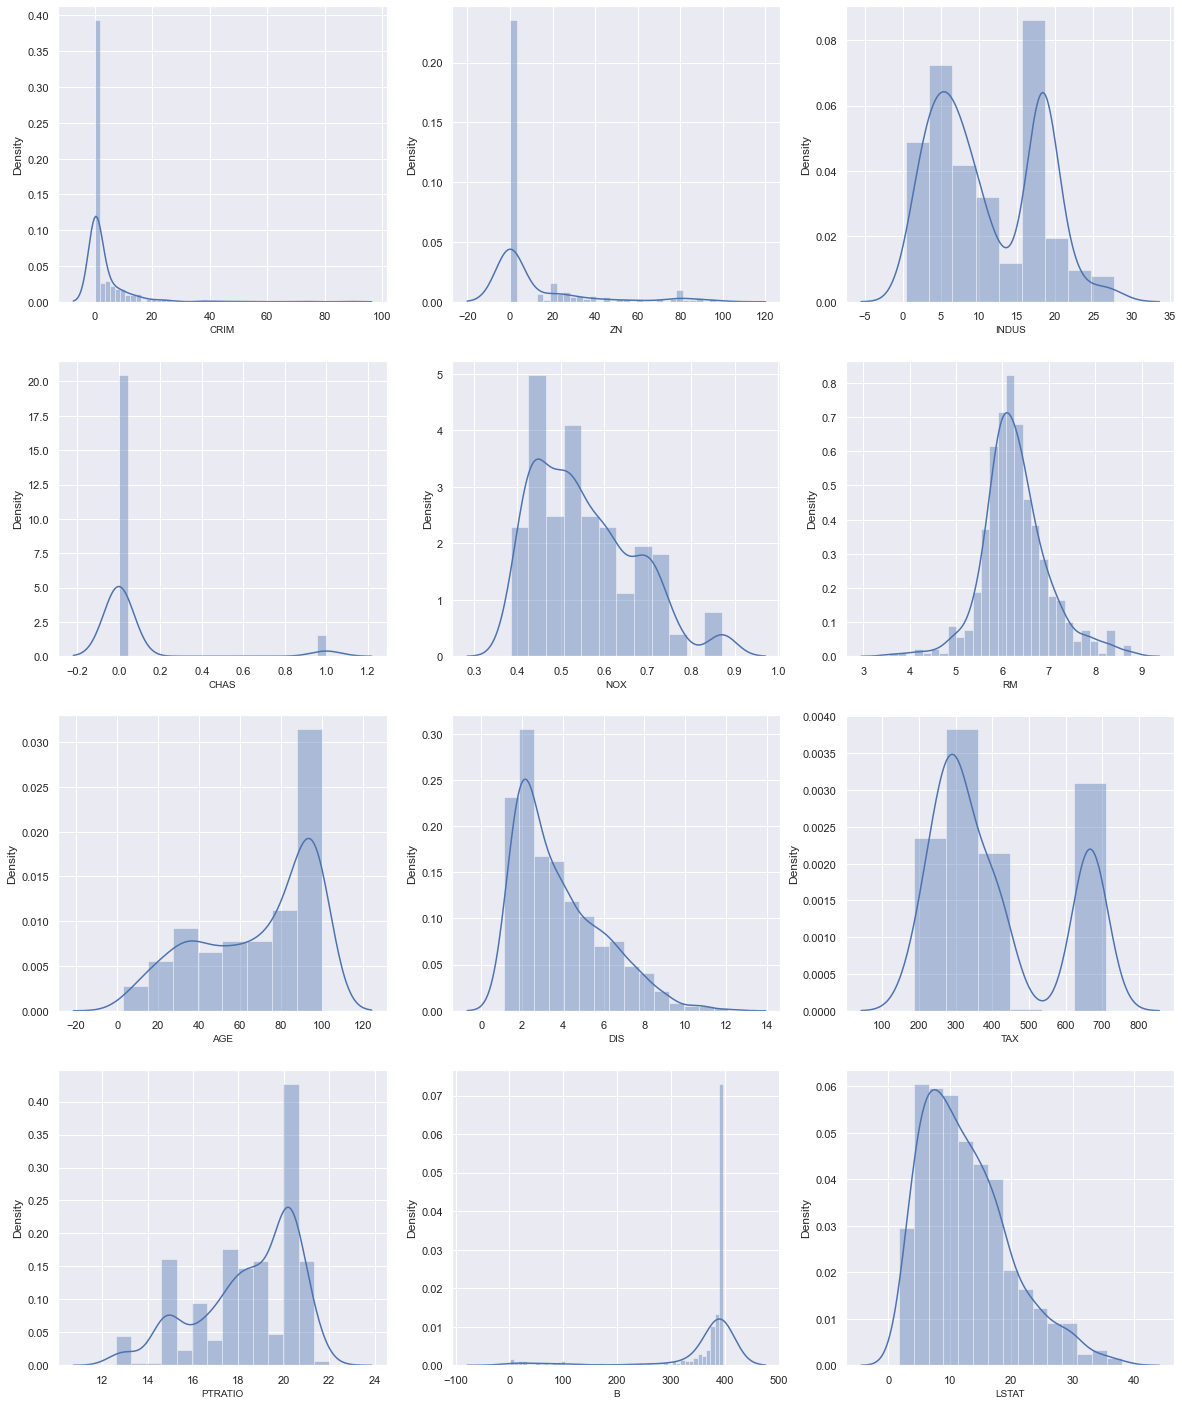

In [103]:
# checking the distribution of the data

plt.figure(figsize=(20,25),facecolor='white')
for count, columns in enumerate(bos):
    if columns != "Price":
        ax = plt.subplot(4,3,count+1) # count alwasys starts from 0, so +1 is added
        plt.xlabel(columns,fontsize=10)
        sns.distplot(bos[columns])

In [104]:
# Check the skewness value of the graphs
for cols in bos[['CRIM','AGE','DIS','B']]:
    print("Skewness value of {} = {}".format(cols,(bos[cols].skew())))

Skewness value of CRIM = 5.223148798243851
Skewness value of AGE = -0.5989626398812962
Skewness value of DIS = 1.0117805793009007
Skewness value of B = -2.8903737121414492


In [105]:
# The 'Crim' value is right skewed, so applying log transformation
bos['CRIM_Log'] = np.log(bos['CRIM'])

In [106]:
bos['CRIM_Log'].skew() # This value seems to be better

0.4059344988496048

In [107]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price,CRIM_Log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-5.064036
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-3.600502
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-3.601235
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-3.430523
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-2.672924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,-2.770511
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,-3.095111
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,-2.800824
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,-2.211009


In [108]:
# dropping CRIM Value and using CRIM_Log 
bos = bos.drop('CRIM',axis=1)
bos

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price,CRIM_Log
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,-5.064036
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,-3.600502
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,-3.601235
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,-3.430523
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,-2.672924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,-2.770511
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,-3.095111
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,-2.800824
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,-2.211009


C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM_Log', ylabel='Density'>

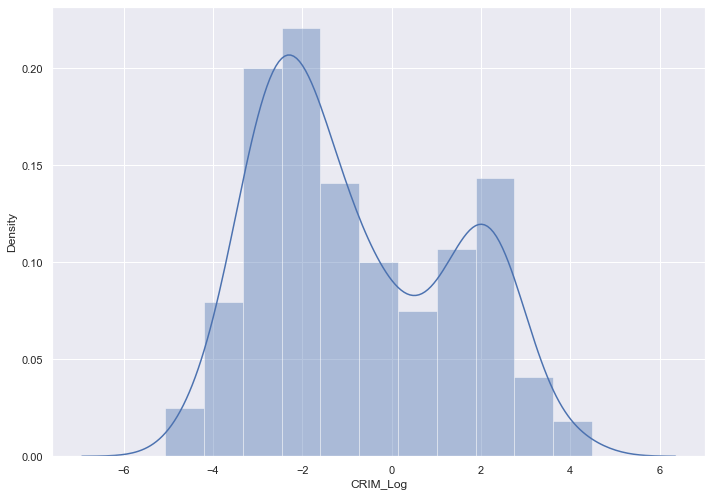

In [109]:
sns.distplot(bos['CRIM_Log'])

In [110]:
x = bos.drop('Price',axis=1)
y = bos['Price']

In [111]:
x

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CRIM_Log
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,-5.064036
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,-3.600502
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,-3.601235
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,-3.430523
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,-2.672924
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,-2.770511
502,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,-3.095111
503,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,-2.800824
504,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,-2.211009


In [112]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable,i) for i in range (variable.shape[1])]
vif['Features'] = x.columns

In [115]:
vif

,VIF,Features
0,2.393550,ZN
1,3.656323,INDUS
2,1.063408,CHAS
3,4.683084,NOX
4,1.896812,RM
5,3.095056,AGE
6,3.902234,DIS
7,4.599478,TAX
8,1.733369,PTRATIO
9,1.357286,B


In [116]:
# the VIF values are < 5 so moving to the next step

C:\Users\Administrator\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


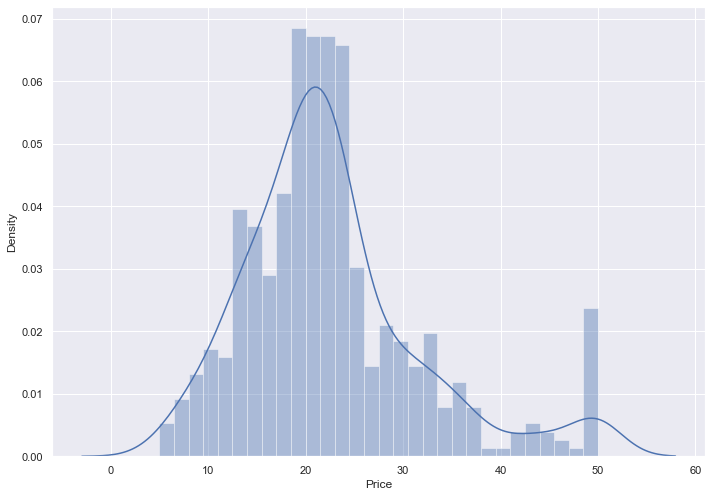

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bos['Price'], bins=30)
plt.show()

In [118]:
bos.columns

Index(['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'Price', 'CRIM_Log'],
      dtype='object')

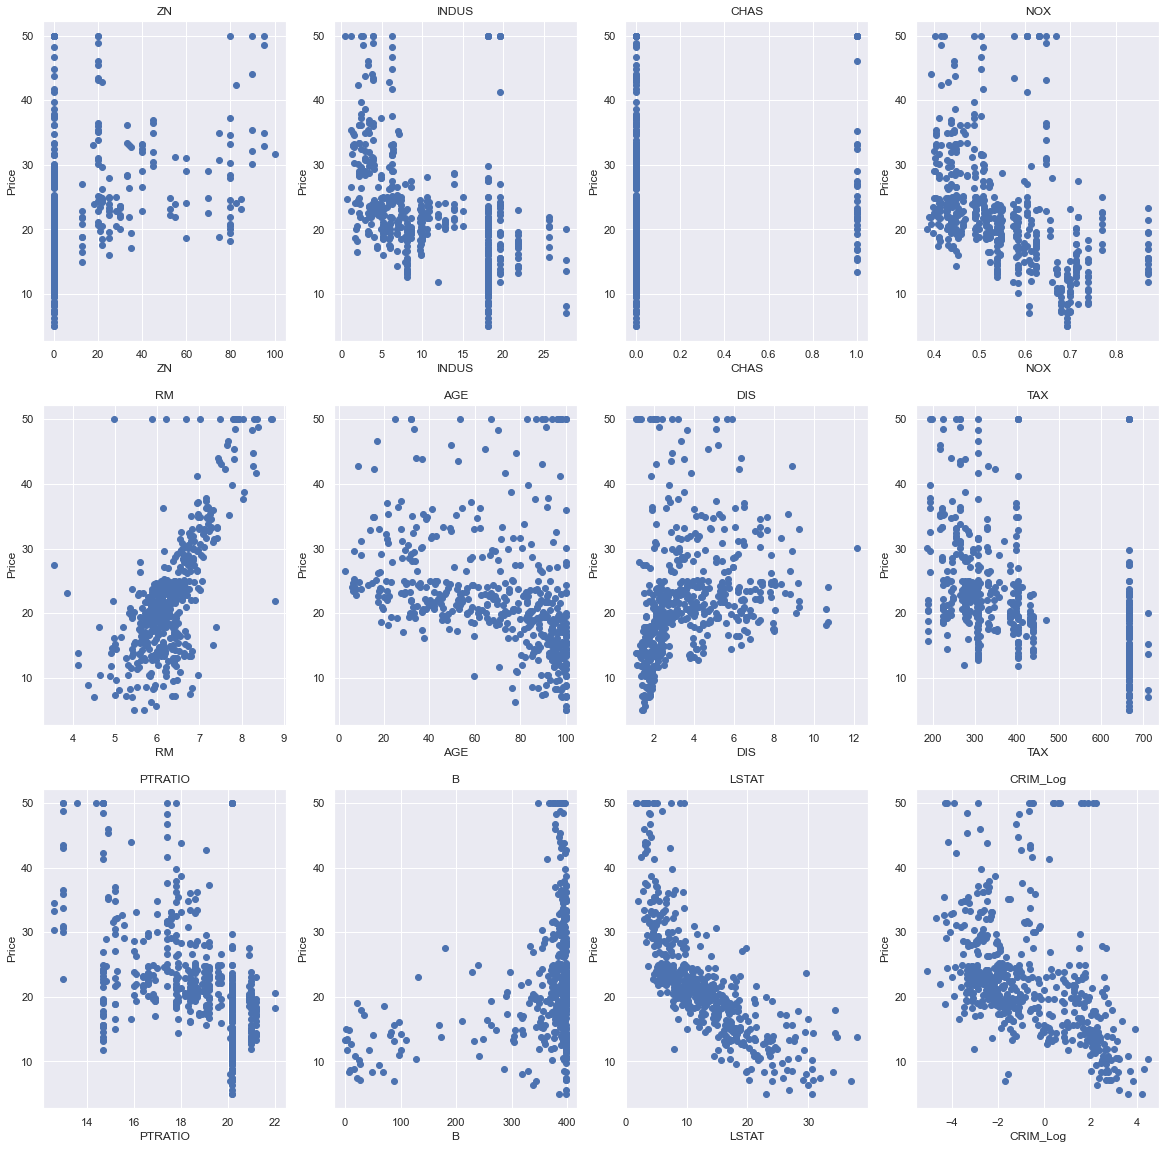

In [119]:
plt.figure(figsize=(20,20))

features = ['ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CRIM_Log']
target = bos['Price']

for i,col in enumerate(features):
    plt.subplot(3,4,i+1)
    x1= bos[col]
    y1 = target
    plt.scatter(x1,y1,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=45)

<IPython.core.display.Javascript object>

In [121]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()

In [122]:
x_train

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CRIM_Log
191,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,398.0,15.2,389.71,4.69,-2.672056
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,-3.430523
275,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,254.0,17.6,396.90,2.98,-2.342991
386,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,666.0,20.2,396.90,28.28,3.194329
146,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,403.0,14.7,169.27,16.65,0.767814
...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,307.0,21.0,232.60,27.71,0.327857
380,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,666.0,20.2,396.90,17.21,4.488369
131,0.0,21.89,0.0,0.624,6.326,97.7,2.2710,437.0,21.2,396.90,12.26,0.176421
414,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,666.0,20.2,88.27,36.98,3.823107


In [123]:
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
lin_reg.score(x_train,y_train)

0.7217365584337396

In [125]:
lin_reg.score(x_test,y_test)

0.7464410995284061

In [127]:
from sklearn.metrics import r2_score
score = r2_score(lin_reg.predict(x_test),y_test)
score

0.6180455614012542

In [130]:
def adj_r2(x,y):
    r2 = lin_reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [132]:
adj_r2(x_test,y_test)

0.7245511225092757

In [139]:
x_predicted = lin_reg.predict(x_train)
x_predicted_test = lin_reg.predict(x_test)

In [145]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train,x_predicted))
r2 = r2_score(y_train,x_predicted)
print(" For training dataset \n RMSE = {}\n R2 Score = {}".format(rmse,r2))
print("------------------------------------------")
rmse = np.sqrt(mean_squared_error(y_test,x_predicted_test))
r2 = r2_score(y_test,x_predicted_test)
print(" For training dataset \n RMSE = {}\n R2 Score = {}".format(rmse,r2))

 For training dataset 
 RMSE = 4.694214397304392
 R2 Score = 0.7217365584337396
------------------------------------------
 For training dataset 
 RMSE = 4.948770212586794
 R2 Score = 0.7464410995284061
